#### Libraries

In [2]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

ModuleNotFoundError: No module named 'tensorflow'

### No Pre-Processing Classifier

In [ ]:
img_w, img_h = 48, 48

train_data_dir = '../COMP_473_Project/TrainSet'
test_data_dir = '../COMP_473_Project/TestSet'
nb_train_samples = 700
nb_validation_samples = 295
epochs = 100
batch_size = 10



### Testing with openCV

In [ ]:
import cv2
import imutils

#rotation
img = cv2.imread("/Users/mantagaori/Desktop/comp473/A3/S010_006_00000013.png")
result = []
rot_angle = [-10, -5, 0, 5, 10]
for a in rot_angle:
    imgr = imutils.rotate(img, angle=a)
    result+=[imgr]
# for i in range(len(result)):
#     print("new image ****")
#     print(result[i][28][5:9])
for r in result:
    cv2.imshow("rotate test", r)
    cv2.waitKey()

#rerotate
angles = [10, 5, 0, -5, -10]
resultu = []
for i in range(len(result)):
    imgr = imutils.rotate(result[i], angle=angles[i])
    resultu+=[imgr]

for i in range(len(result)):
    print("oritianl***")
    print(img[28][5:9])
    print("new image ****")
    print(result[i][28][5:9])
    print("re-rotated image ****")
    print(resultu[i][28][5:9])

# Cropping an image
result2 = []
for r in result:
    imgc = r[10:48, 10:38]
    result2 += [imgc]

for r in result2:
    cv2.imshow("crop", r)
    cv2.waitKey()


#intensity normalization -> Histogram equalization
result3 = []
for r in result:
    R, G, B = cv2.split(r)
    output1_R = cv2.equalizeHist(R)
    output1_G = cv2.equalizeHist(G)
    output1_B = cv2.equalizeHist(B)
    equ = cv2.merge((output1_R, output1_G, output1_B))
    result3 += [equ]


for r in result3:
    cv2.imshow('Normalized Image', r)
    cv2.waitKey()



In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

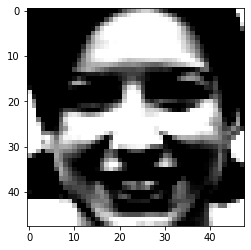

In [22]:
img = cv2.imread("/Users/mantagaori/Desktop/comp473/A3/S010_006_00000013.png")
imgr = tf.image.adjust_brightness(img, delta=0.1)
imgc = tf.image.adjust_contrast(img, 3)

plt.imshow(imgc.numpy().astype('uint8'))
plt.show()